In [ ]:
#----------------------------------------------------------------------------
# This code generates univariate analysis in Excel and data quality check graphs in Powerpoint
# Created By  : Eugenie Cha
# Created Date: 7 Aug 2022
# version ='1.0'
# ---------------------------------------------------------------------------

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns   #for boxplot
from pptx import Presentation
from pptx.util import Inches

In [2]:
#project name
prj_nm='Car Rental'

In [3]:
#working directory
import os
os.chdir('/Users/Shared/Python/carrental')

In [4]:
#get today date to save the result in date tab
from datetime import date
today = date.today().strftime("%m-%d-%y")
print(today)

08-14-22


In [5]:
# load data
# data source - https://www.kaggle.com/datasets/kushleshkumar/cornell-car-rental-dataset
url  = 'https://github.com/eugenieC/CarRental/blob/main/CarRentalDataV1.csv?raw=true'
df = pd.read_csv(url)

In [6]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
0,ELECTRIC,5.00,13.0,12.0,Seattle,US,47.449107,-122.308841,WA,12847615.0,135.0,Tesla,Model X,suv,2019.0,Albuquerque
1,ELECTRIC,5.00,2.0,1.0,Tijeras,US,35.111060,-106.276551,NM,15621242.0,190.0,Tesla,Model X,suv,2018.0,Albuquerque
2,HYBRID,4.92,28.0,24.0,Albuquerque,US,35.127163,-106.566681,NM,10199256.0,35.0,Toyota,Prius,car,2012.0,Albuquerque
3,GASOLINE,5.00,21.0,20.0,Albuquerque,US,35.149726,-106.711425,NM,9365496.0,75.0,Ford,Mustang,car,2018.0,Albuquerque
4,GASOLINE,5.00,3.0,1.0,Albuquerque,US,35.208659,-106.601008,NM,3553565.0,47.0,Chrysler,Sebring,car,2010.0,Albuquerque


In [7]:
# univariate analysis for numeric columns
desc_num=df.describe()
desc_num

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


In [8]:
#create the output directory if not exist
if os.path.exists('univariate')==0: os.makedirs('univariate')
excel_path='univariate/carrental_univariate.xlsx'

#define excel export function
def export_as_excel(df_nm,xls_path,sh_nm):
    if os.path.isfile(xls_path):  
        #if file exist, append the sheet to the excel
      with pd.ExcelWriter(excel_path, mode='a',engine="openpyxl") as writer:
        df_nm.to_excel(writer, sheet_name= sh_nm)
    else:
        #if file not exist, create excel file
      with pd.ExcelWriter(xls_path) as writer:
        df_nm.to_excel(writer, sheet_name= sh_nm)

In [9]:
# export numeric column to excel
sheet_name_in = 'num ' + today 

export_as_excel(df_nm=desc_num,xls_path=excel_path,sh_nm=sheet_name_in)

In [10]:
#categorical column list
cat_cols = df.select_dtypes(include=object).columns.tolist()

#save frequencies of categorical columns
cat_freq = (pd.DataFrame(
                    df[cat_cols]
                    .melt(var_name='column', value_name='value')
                    .value_counts())
                    .rename(columns={0: 'counts'})
                    .sort_values(by=['column', 'counts']))
cat_freq

counts
column       value                   
airportcity  Green Bay              1
             Joplin                 1
             Chicago/Rockford       1
             Billings               1
             Bangor                 1
...                               ...
vehicle.type van                   55
             truck                191
             minivan              232
             suv                 1714
             car                 3659

[1710 rows x 1 columns]

In [11]:
# export categorical column to excel
sheet_name_in = 'category ' + today 

export_as_excel(df_nm=cat_freq,xls_path=excel_path,sh_nm=sheet_name_in)

In [12]:
df_plot_mean=df.groupby(by = "vehicle.type").mean('rate.daily')
df_plot_mean.head()
#df_plot_mean.plot.line()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
vehicle.type,,,,,,,,
car,4.916484,36.594971,31.300355,35.125038,-98.553183,5.886523e+06,95.413501,2015.185297
minivan,4.866878,30.750000,25.025862,35.555725,-100.585715,5.618114e+06,60.793103,2014.219828
suv,4.931248,29.270712,24.657526,36.433702,-101.462943,6.301156e+06,95.268378,2015.764877
truck,4.959938,22.418848,18.895288,36.610846,-101.544322,6.880713e+06,81.109948,2015.806283
van,4.956341,7.072727,5.145455,36.072801,-103.762277,6.421886e+06,112.454545,2015.509091


In [13]:
#define data quality check graphs for numeric columns
def numeric_column_dq_ppt(df_in,x_axis,file_path):
    # create numeric column list using "exclude=object" option 
    num_cols = df_in.select_dtypes(exclude=object).columns.tolist()
    num_cols_x = num_cols.copy()
    # numeric column + category group column (or could be period)
    num_cols_x.append(x_axis)

    #create a sub data for the analysis
    df_num = df_in[num_cols_x]

    # calculate the underlying data for graphs
    average   = df_num.groupby(by = x_axis).mean()
    maxi      = df_num.groupby(by = x_axis).max()
    mini      = df_num.groupby(by = x_axis).min()
    Q3        = df_num.groupby(by = x_axis).quantile(.75)
    med       = df_num.groupby(by = x_axis).quantile(.50)
    Q1        = df_num.groupby(by = x_axis).quantile(.25)
    miss_rate = df_num.groupby(by = x_axis).apply(lambda x: x.isnull().mean()) 
    zero_rate = df_num.groupby(by = x_axis).apply(lambda x: x.isin([0]).mean()) 

    #create a ppt object
    po = Presentation()
    po.slide_width  = Inches(16)
    po.slide_height = Inches(9)

    # PPT file creation and slide layout setting
    # source: https://www.tutorialspoint.com/how-to-create-powerpoint-files-using-python
    Layout = po.slide_layouts[0] 
    first_slide = po.slides.add_slide(Layout) 
    po.slide_width = Inches(16)
    first_slide.shapes.title.text = prj_nm + " Data Quality - Numeric"
    first_slide.placeholders[1].text = today
    ppt_file_name = file_path+"/"+prj_nm + " Data Quality - Numeric "+today+".pptx"
    if os.path.isfile(ppt_file_name): os.remove(ppt_file_name)
    po.save(ppt_file_name)
    Second_Layout = po.slide_layouts[5]  #title only layout


    # for loop to generate graphs for numeric columns.
    for col in num_cols:
        # 2 X 2 plot array
        fig, ax = plt.subplots(2,2,figsize = (12,9))

        # Average
        ax[0,0].plot(average[col],'tab:green', label='Average')
        #ax[0,0].set_title("Average")
        ax[0,0].legend()

        # univariate
        ax[0,1].plot(maxi[col], label='Max')
        ax[0,1].plot(Q3[col], label='Q3')
        ax[0,1].plot(med[col], label='Median')
        ax[0,1].plot(Q1[col], label='Q1')
        ax[0,1].plot(mini[col], label='Min')
        #ax[0,1].set_title("Max & Min")
        ax[0,1].legend()

        #missing rate plot
        ax[1,0].plot(miss_rate[col],'tab:red', label='Missing Rate')
        #ax[1,0].set_title("Missing Rate")
        ax[1,0].legend()
        yvals = ax[1,0].get_yticks()
        ax[1,0].set_yticklabels(["{:,.0%}".format(y) for y in yvals])

        #zero rate plot
        ax[1,1].plot(zero_rate[col],'tab:gray',label='Zero Rate')
        #ax[1,1].set_title("Zero Rate")
        ax[1,1].legend()
        yvals = ax[1,1].get_yticks()
        ax[1,1].set_yticklabels(["{:,.0%}".format(y) for y in yvals])

        #save temp image file
        plt.savefig('temp_plot.png')
        tmp_plot = 'temp_plot.png'    

        # column name title
        plt.text(x=0.5, y=0.91, s= col+" by "+x_axis, fontsize=16, ha="left", transform=fig.transFigure)
        second_slide = po.slides.add_slide(Second_Layout)
        second_slide.shapes.title.text = col

        #insert graph

        left = Inches(1)
        top = Inches(0.7)
        plot = second_slide.shapes.add_picture(tmp_plot, left, top)

        po.save(ppt_file_name)

/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/2696701511.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_yticklabels(["{:,.0%}".format(y) for y in yvals])
/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/2696701511.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_yticklabels(["{:,.0%}".format(y) for y in yvals])
/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/2696701511.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_yticklabels(["{:,.0%}".format(y) for y in yvals])
/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/2696701511.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_yticklabels(["{:,.0%}".format(y) for y in yvals])
/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/2696701511.py:64: UserWarning: FixedFormatter should

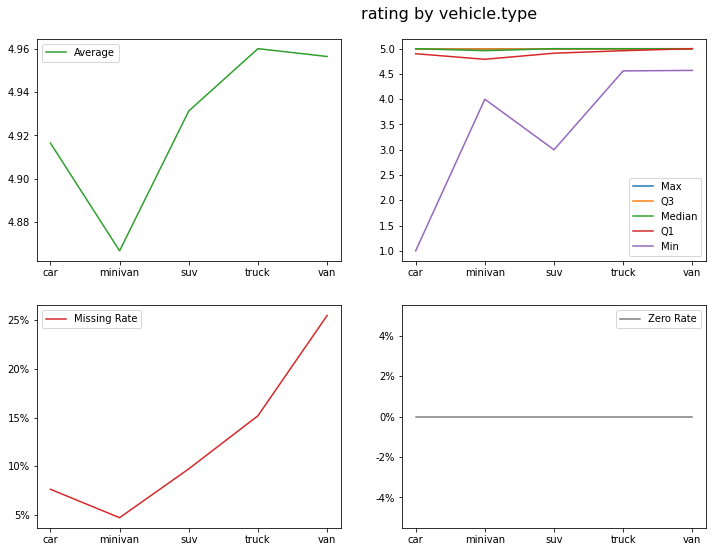

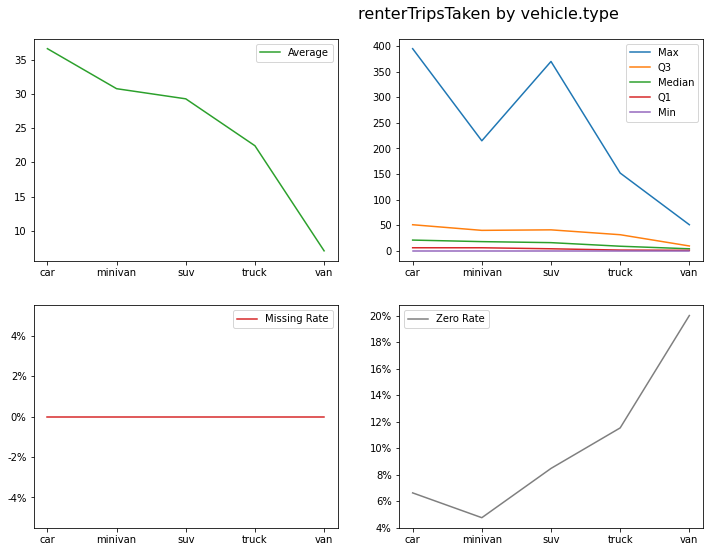

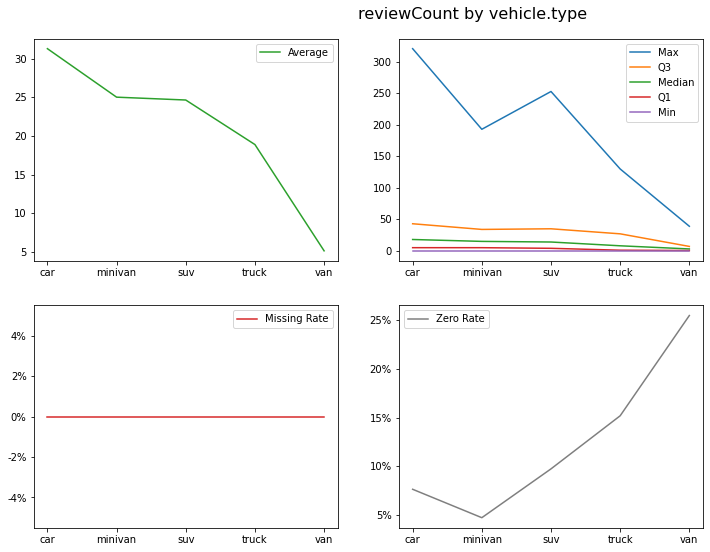

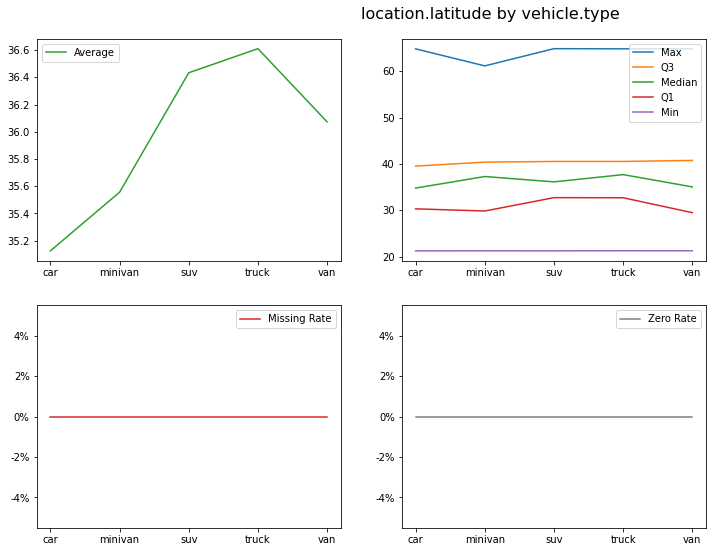

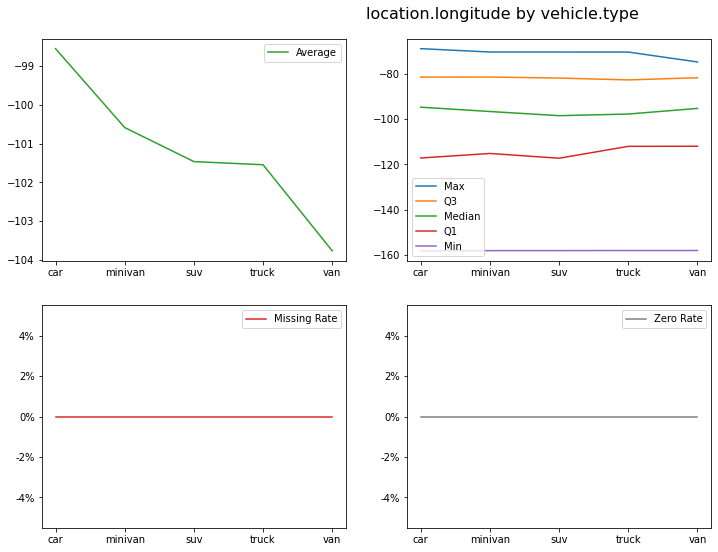

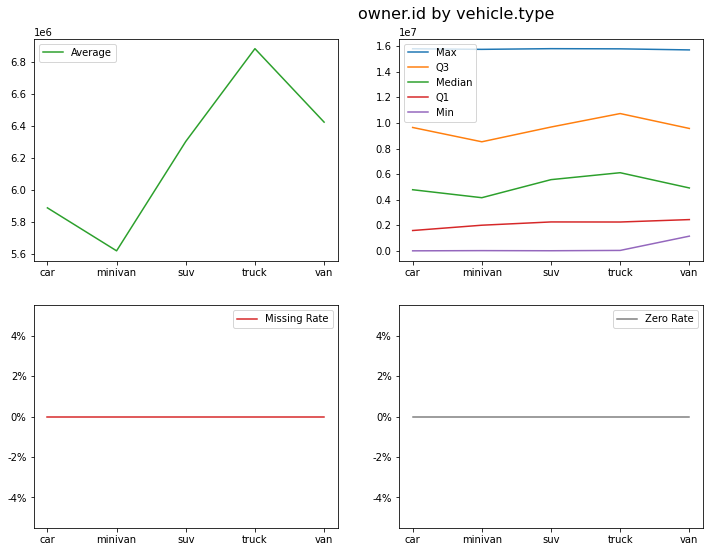

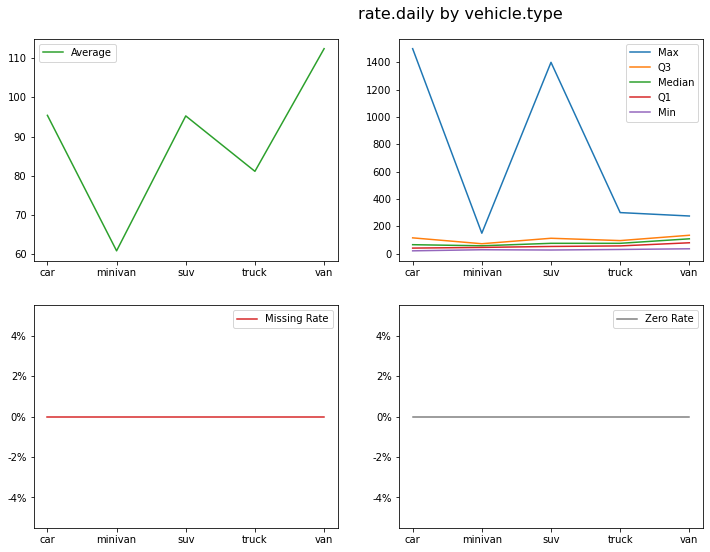

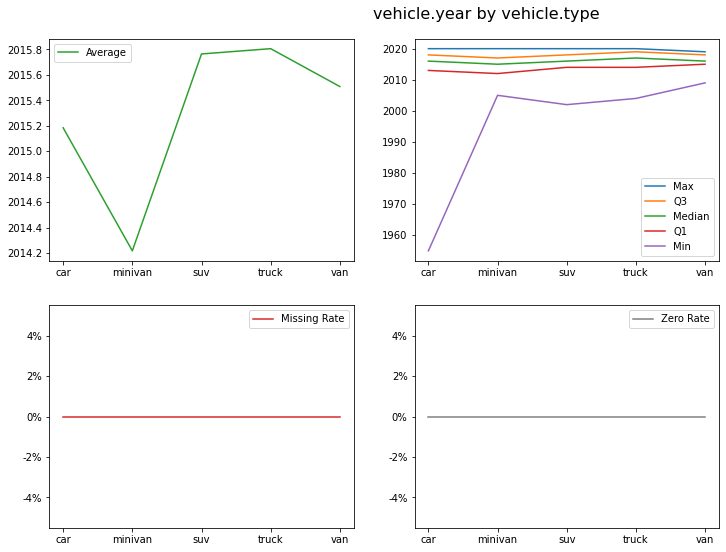

In [14]:
#execute data quality analysis for numeric column
#create the output directory if not exist
if os.path.exists('data quality')==0: os.makedirs('data quality')
numeric_column_dq_ppt(df_in=df,x_axis = "vehicle.type",file_path="data quality")

In [15]:
#define data quality check graphs for categorical columns
def categorical_column_dq_ppt(df_in,x_axis,top_n,file_path):    

    cat_cols = df_in.select_dtypes(include=object).columns.tolist()
    df_cat = df_in[cat_cols]

    # PPT file creation and slide layout setting
    # source: https://www.tutorialspoint.com/how-to-create-powerpoint-files-using-python
    
    #create a ppt object
    po = Presentation()
    po.slide_width  = Inches(16)
    po.slide_height = Inches(9)
    
    Layout = po.slide_layouts[0] 
    first_slide = po.slides.add_slide(Layout) 
    po.slide_width = Inches(16)
    first_slide.shapes.title.text = prj_nm + " Data Quality - Categorical"
    first_slide.placeholders[1].text = today
    ppt_file_name = file_path+"/"+prj_nm + " Data Quality - Categorical "+today+".pptx"
    if os.path.isfile(ppt_file_name): os.remove(ppt_file_name)
    po.save(ppt_file_name)
    Second_Layout = po.slide_layouts[5]  #title only layout

    #for loop to run through all categorical columns
    for col in cat_cols:
        if col!=x_axis:

            # 1 X 2 plot array to show 
            # left-hand side: selected column distribition 
            # right-hand side: stacked column graph for the selected column by x_axis
            fig, (ax1, ax2)  = plt.subplots(1, 2,
                                    sharey='row',figsize = (12,6))

            df_freq=df_cat[col].value_counts(sort=True).rename_axis(col).reset_index(name='counts')    
            sorted_df = df_freq.sort_values("counts", ascending=False)
            # the number of category is limited to top n + others to avoid complexity in the graph
            # for top n groups 
            top_n_data = sorted_df.iloc[:top_n]
            top_n_x=top_n_data[[col]]  #for stacked bar chart
            # not top n as others
            cnt_others = sorted_df["counts"].iloc[top_n:].sum()
            if cnt_others>0:
                others_data = pd.DataFrame([["others", cnt_others]], columns=[col, 'counts'])
            # append others
            if cnt_others>0:
                top_n_data=top_n_data.append(others_data,ignore_index=False)

            #bar chart    
            ax1.bar(list(top_n_data[col]), list(top_n_data['counts'])) 

            #stacked bar chart by x-axis column
            #top_n
            top_n_x_axis=top_n_x.merge(df_cat, on=col, how='left')
            df_2_dim=pd.crosstab(index=top_n_x_axis[x_axis], columns=top_n_x_axis[col])
            #others
            others_x=pd.merge(top_n_x,df_cat, how='outer', left_on=col, right_on=col, indicator = True)
            others_x=others_x.loc[others_x['_merge']=='right_only']
            others_x[col]='others'
            df_2_others_dim=pd.crosstab(index=others_x[x_axis], columns=others_x[col])

            #merge top_n with others
            stk_df=df_2_dim.merge(df_2_others_dim, on=x_axis, how='outer')
            stk_df=stk_df.reset_index()
            display(stk_df)
            stk_df.plot(ax=ax2,x=x_axis, kind='bar', stacked=True)


            #save temp image file
            plt.savefig('temp_plot.png')
            tmp_plot = 'temp_plot.png'    

            # column name title

            plt.text(x=0.5, y=0.91, s=col, fontsize=16, ha="left", transform=fig.transFigure)
            second_slide = po.slides.add_slide(Second_Layout)
            graph_title= col+ " & by "+x_axis
            second_slide.shapes.title.text = graph_title

            #insert graph
            left = Inches(1)
            top = Inches(0.7)
            plot = second_slide.shapes.add_picture(tmp_plot, left, top)

            po.save(ppt_file_name)


fuelType,vehicle.type,DIESEL,ELECTRIC,GASOLINE,HYBRID,others
0,car,21,483,2847,252,56
1,minivan,0,0,230,1,1
2,suv,28,139,1513,20,14
3,truck,13,0,174,1,3
4,van,8,0,46,0,1


/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/1979298274.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_n_data=top_n_data.append(others_data,ignore_index=False)


location.city,vehicle.type,Las Vegas,Orlando,Phoenix,Portland,San Diego,others
0,car,133,88,79,78,108,3173
1,minivan,2,12,11,8,8,191
2,suv,50,29,43,78,41,1473
3,truck,1,3,4,2,5,176
4,van,0,0,0,0,1,54


location.country,vehicle.type,US
0,car,3659
1,minivan,232
2,suv,1714
3,truck,191
4,van,55


/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/1979298274.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_n_data=top_n_data.append(others_data,ignore_index=False)


location.state,vehicle.type,CA,CO,FL,NV,TX,others
0,car,692,70,559,158,333,1847
1,minivan,26,20,46,4,13,123
2,suv,228,128,199,70,131,958
3,truck,18,16,19,1,18,119
4,van,2,4,13,0,4,32


/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/1979298274.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_n_data=top_n_data.append(others_data,ignore_index=False)


vehicle.make,vehicle.type,BMW,Chevrolet,Ford,Tesla,Toyota,others
0,car,364,290,278,461,368,1898
1,minivan,0,1,1,0,49,181
2,suv,92,98,80,137,131,1176
3,truck,0,19,58,0,43,71
4,van,0,23,19,0,0,13


/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/1979298274.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_n_data=top_n_data.append(others_data,ignore_index=False)


vehicle.model,vehicle.type,Model 3,Model S,Model X,Mustang,Wrangler,others
0,car,331.0,130.0,0.0,151.0,0.0,3047
1,suv,0.0,0.0,114.0,0.0,123.0,1477
2,minivan,NaN,NaN,NaN,NaN,NaN,232
3,truck,NaN,NaN,NaN,NaN,NaN,191
4,van,NaN,NaN,NaN,NaN,NaN,55


/var/folders/yg/8l7vy81x01q9gxk26s5qtqnr0000gn/T/ipykernel_9155/1979298274.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_n_data=top_n_data.append(others_data,ignore_index=False)


airportcity,vehicle.type,Atlanta,Honolulu,Las Vegas,Orlando,Portland,others
0,car,143,104,144,132,99,3037
1,minivan,3,13,2,20,9,185
2,suv,51,68,53,50,98,1394
3,truck,2,10,1,3,5,170
4,van,0,5,0,3,0,47


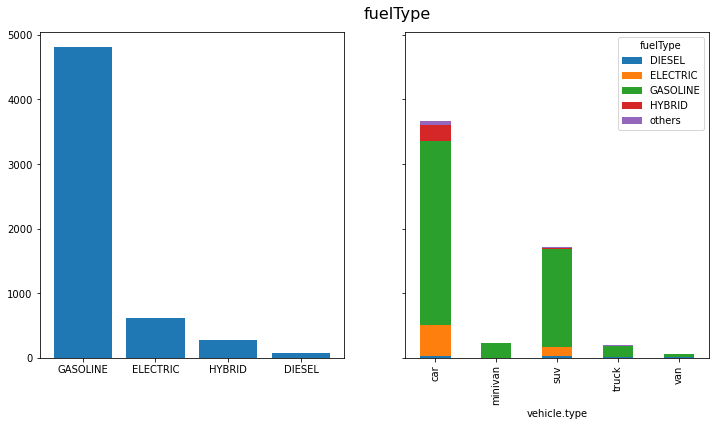

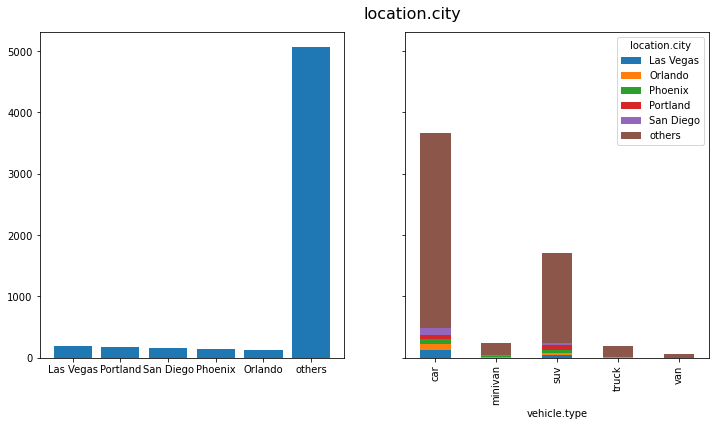

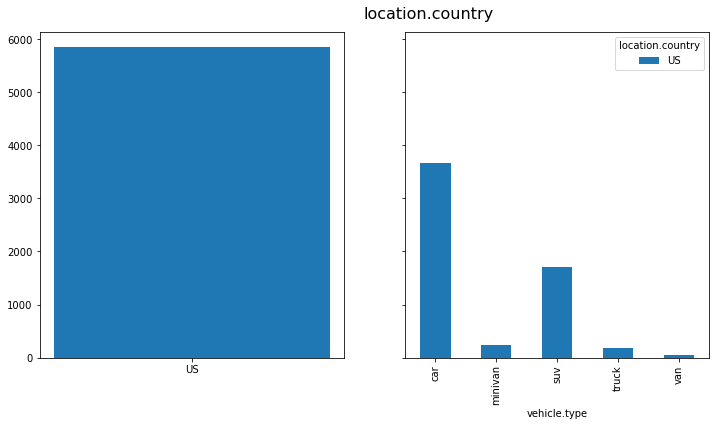

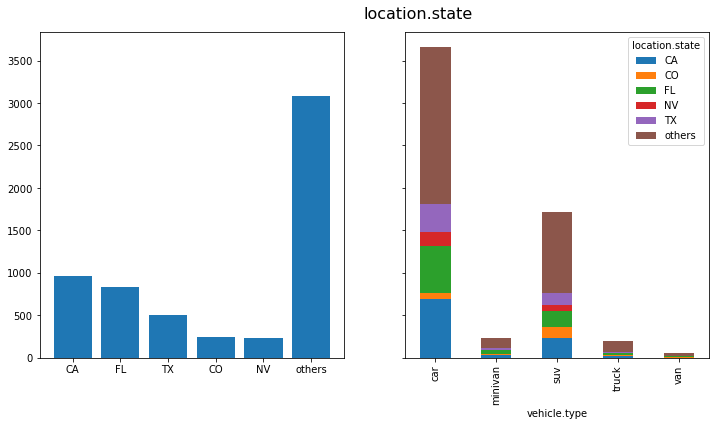

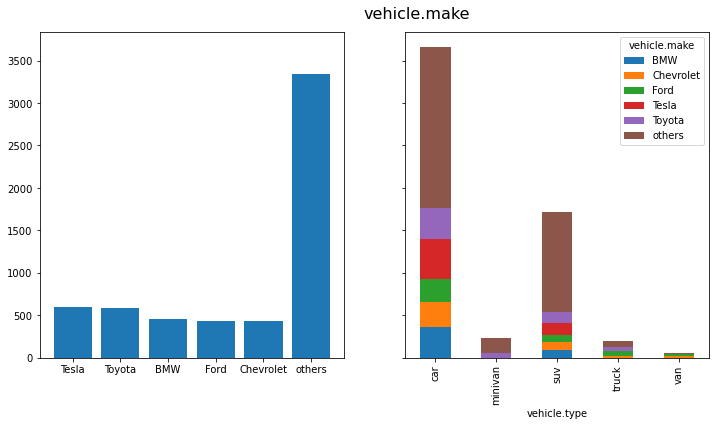

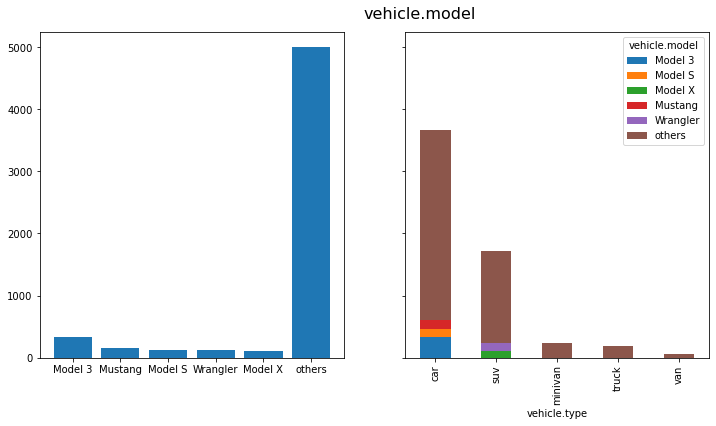

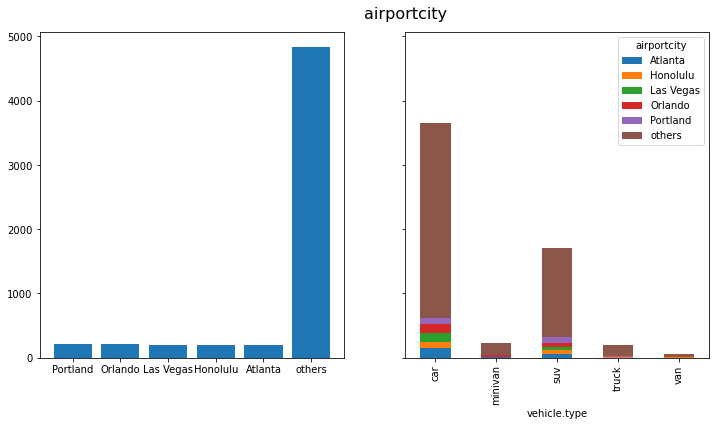

In [16]:
#execute data quality analysis for numeric column
categorical_column_dq_ppt(df_in=df,x_axis = "vehicle.type",top_n=5,file_path="data quality")

In [17]:
#rating by features
#trip taken by column
def triptaken_barplot(df_in,col,top_n):
    num_trip   = df_in[['renterTripsTaken',col]].groupby(by = col, as_index =False).sum()
    num_trip = num_trip.sort_values('renterTripsTaken', ascending=True).reset_index(drop=True)

    trips = num_trip['renterTripsTaken'].tail(top_n)
    name = num_trip[col].tail(top_n)

    # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    bars = ax.barh(name, trips, align='center')
    ax.bar_label(bars)

    # Add Plot Title
    ax.set_title('#renterTripsTaken by '+col,
                 loc ='left', )


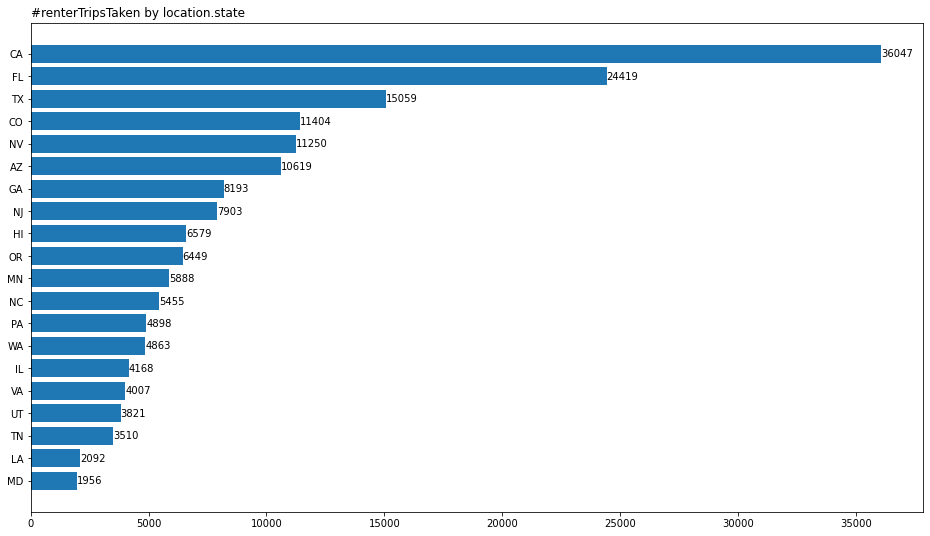

In [18]:
# Triptaken by state
triptaken_barplot(df_in=df,col='location.state',top_n=20)

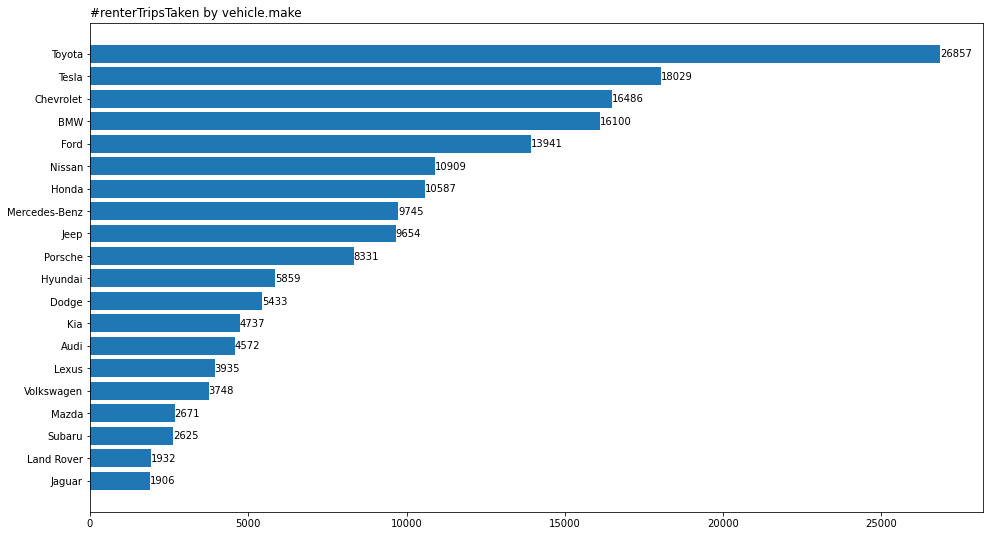

In [19]:
# Triptaken by maker
triptaken_barplot(df_in=df,col='vehicle.make',top_n=20)

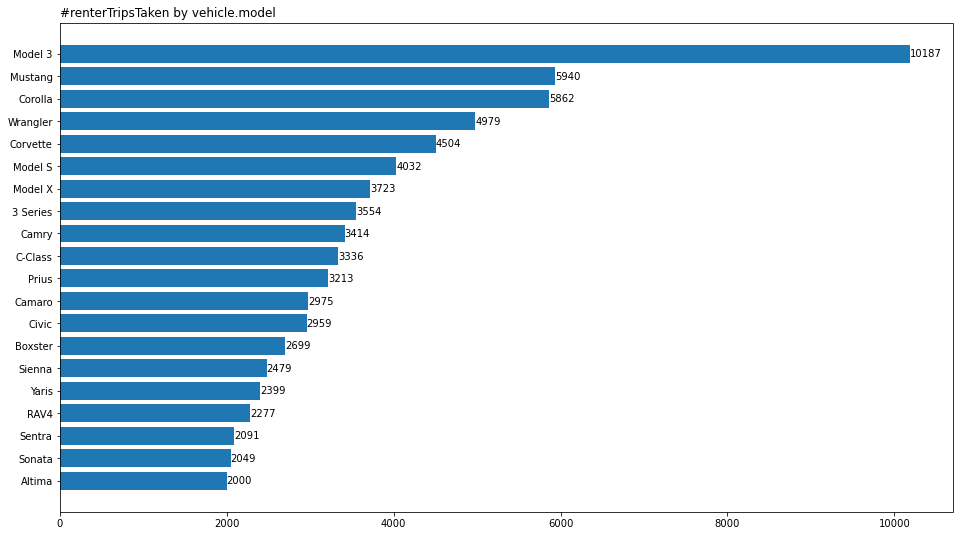

In [20]:
# Triptaken by model
triptaken_barplot(df_in=df,col='vehicle.model',top_n=20)

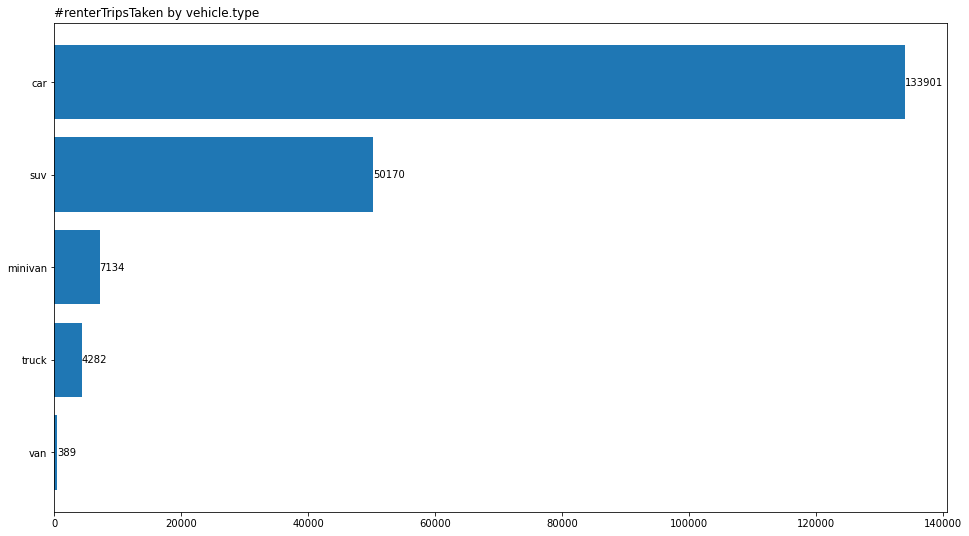

In [21]:
# Triptaken by type
triptaken_barplot(df_in=df,col='vehicle.type',top_n=20)

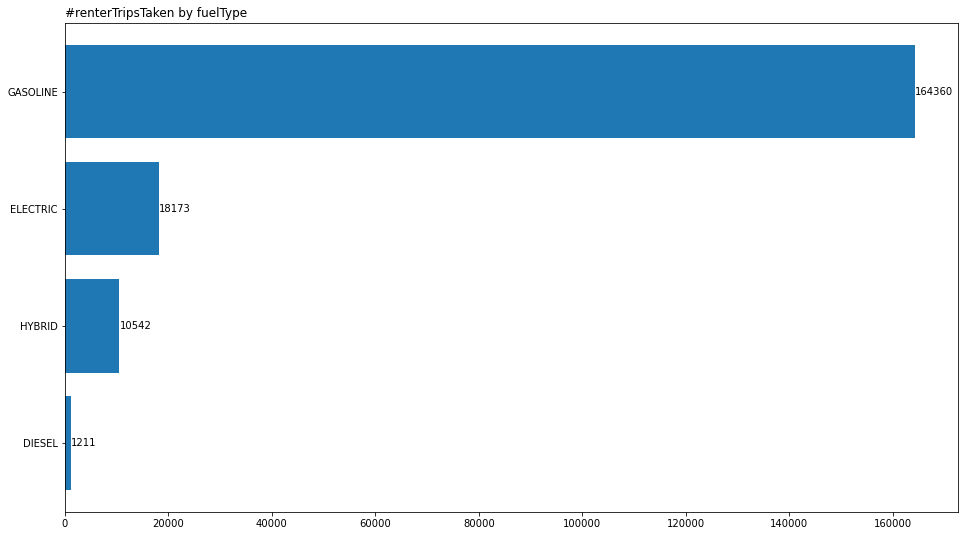

In [22]:
# Triptaken by fuel type
triptaken_barplot(df_in=df,col='fuelType',top_n=20)

In [23]:
# rate by column graph
def rate_scatterplot(df_in,col,top_n):
    rate_median   = df_in[['rate.daily',col]].groupby(by = col, as_index =False).quantile(.50)
    rate_median.rename(columns={"rate.daily": "rate.daily median"}, inplace=True)
    rate_median = rate_median.sort_values("rate.daily median", ascending=False).reset_index(drop=True)


    rates = rate_median.head(top_n)
 #     name = rate_median[col].tail(top_n)
    rates_data=rates.merge(df_in[['rate.daily',col]], on=col, how='left')

    # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Scatter Plot    
    sns.scatterplot(x='rate.daily', y=col, hue=col, data=rates_data) 
    
    # Plot the average line
    rates_line = ax.plot(rates["rate.daily median"],rates[col], label="Median", linestyle='--')
    # Make a legend
    legend = ax.legend(loc='upper right')

    # Add Plot Title
    ax.set_title('#Daily rate by '+col, loc ='left', )

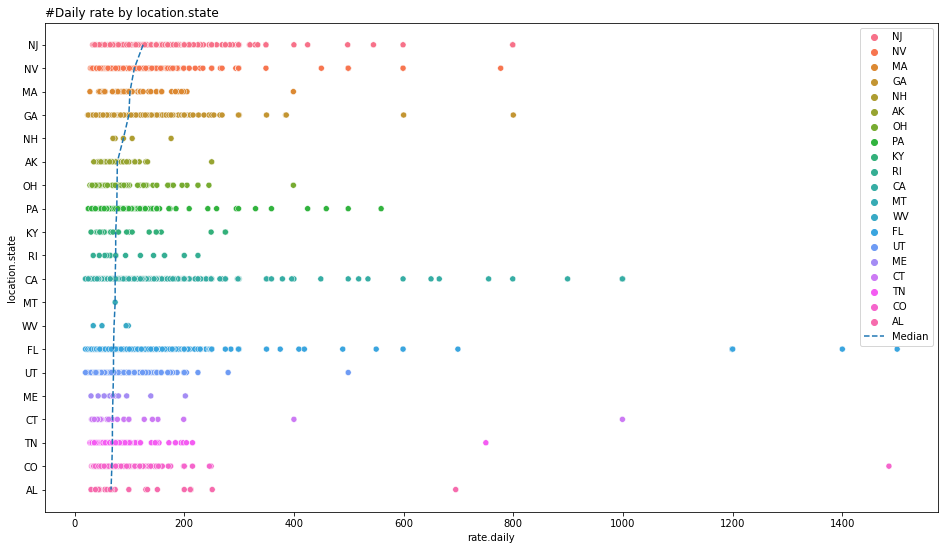

In [179]:
# Daily rate by state
rate_scatterplot(df_in=df,col='location.state',top_n=20)
